<a href="https://colab.research.google.com/github/jelade/Jaleel/blob/master/Classification_DMBDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMBDA Project: Unsupervised and supervised mining
___

#**Unsupervised mining**

# **Importing Library needed**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,adjusted_rand_score
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# **Data of cleaning**

> **Importation data**


> **Descriptive Statisatics**





In [ ]:
mfeat_mor = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/mfeat/mfeat-mor',names=['mor'], sep='\n')

In [ ]:
mfeat_mor = mfeat_mor.mor.str.split(expand=True)
mfeat_mor.head(2000)

0           1           2             3           4  \
0     1.00000000  0.00000000  0.00000000  133.15086140  1.31169276   
1     1.00000000  0.00000000  0.00000000  126.72486140  1.30274497   
2     1.00000000  0.00000000  0.00000000  131.17386140  1.31903101   
3     1.00000000  0.00000000  0.00000000  129.47886140  1.27087816   
4     1.00000000  0.00000000  0.00000000  127.26286140  1.32963668   
...          ...         ...         ...           ...         ...   
1995  1.00000000  1.00000000  1.00000000  157.49886140  1.65579375   
1996  1.00000000  1.00000000  1.00000000  152.40486140  1.62034524   
1997  1.00000000  1.00000000  1.00000000  134.67286140  1.54198735   
1998  1.00000000  1.00000000  1.00000000  142.92686140  1.42638097   
1999  1.00000000  1.00000000  1.00000000  133.92086140  1.56462053   

                  5  
0     1620.22177892  
1     1609.33482208  
2     1568.97843469  
3     1695.05528143  
4     1647.72023493  
...             ...  
1995  5326.02588861  
1996  5243.26775360  
1997  3766.76322195  
1998  4118.32732012  
1999  3808.02131663  

[2000 rows x 6 columns]

In [ ]:
mfeat_morf= mfeat_mor.astype(float) #convert the data to float
mfeat_morf.columns = ['mor'+str(i+1) for i in range(6)]
mfeat_morf

mor1  mor2  mor3        mor4      mor5         mor6
0      1.0   0.0   0.0  133.150861  1.311693  1620.221779
1      1.0   0.0   0.0  126.724861  1.302745  1609.334822
2      1.0   0.0   0.0  131.173861  1.319031  1568.978435
3      1.0   0.0   0.0  129.478861  1.270878  1695.055281
4      1.0   0.0   0.0  127.262861  1.329637  1647.720235
...    ...   ...   ...         ...       ...          ...
1995   1.0   1.0   1.0  157.498861  1.655794  5326.025889
1996   1.0   1.0   1.0  152.404861  1.620345  5243.267754
1997   1.0   1.0   1.0  134.672861  1.541987  3766.763222
1998   1.0   1.0   1.0  142.926861  1.426381  4118.327320
1999   1.0   1.0   1.0  133.920861  1.564621  3808.021317

[2000 rows x 6 columns]

In [ ]:
mfeat_morf.describe()

mor1         mor2         mor3         mor4         mor5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.492500     1.733500     0.713500   156.418886     1.639569   
std       0.664955     1.141985     0.699759    25.010014     0.291316   
min       0.000000     0.000000     0.000000    99.508861     1.143130   
25%       0.000000     1.000000     0.000000   135.014361     1.363562   
50%       0.000000     2.000000     1.000000   150.063861     1.625846   
75%       1.000000     3.000000     1.000000   175.728861     1.881523   
max       2.000000     6.000000     5.000000   231.276861     2.558830   

               mor6  
count   2000.000000  
mean    6155.200435  
std     3757.634467  
min     1439.534940  
25%     3099.331040  
50%     5255.432237  
75%     9093.955756  
max    17572.199943

In [ ]:
mfeat_mor.isnull().sum() #check the missig data

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [ ]:
mfeat_pix = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mfeat/mfeat-pix",sep = '\n',names=['pix'])

In [ ]:
mfeat_pix = mfeat_pix.pix.str.split(expand=True)

In [ ]:
mfeat_pixf= mfeat_pix.astype(float)#convert the data to float
mfeat_pixf.columns = ['pix'+str(i+1) for i in range(240)]
mfeat_pixf

pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  pix10  ...  \
0      0.0   3.0   4.0   4.0   6.0   6.0   6.0   6.0   6.0    5.0  ...   
1      0.0   0.0   0.0   0.0   0.0   0.0   1.0   3.0   4.0    4.0  ...   
2      0.0   0.0   1.0   4.0   4.0   4.0   4.0   4.0   4.0    3.0  ...   
3      0.0   0.0   3.0   3.0   2.0   2.0   4.0   5.0   6.0    6.0  ...   
4      0.0   0.0   0.0   0.0   0.0   0.0   3.0   4.0   6.0    6.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1995   0.0   0.0   0.0   1.0   3.0   4.0   5.0   6.0   4.0    4.0  ...   
1996   0.0   0.0   0.0   0.0   3.0   6.0   6.0   6.0   6.0    6.0  ...   
1997   0.0   0.0   0.0   2.0   4.0   4.0   4.0   6.0   4.0    4.0  ...   
1998   0.0   0.0   0.0   0.0   0.0   0.0   2.0   4.0   4.0    5.0  ...   
1999   0.0   0.0   1.0   5.0   6.0   6.0   6.0   6.0   6.0    6.0  ...   

      pix231  pix232  pix233  pix234  pix235  pix236  pix237  pix238  pix239  \
0        4.0     4.0     4.0     4.0     4.0     3.0     0.0     0.0     0.0   
1        2.0     4.0     4.0     4.0     4.0     2.0     0.0     0.0     0.0   
2        1.0     3.0     4.0     4.0     4.0     4.0     4.0     2.0     1.0   
3        4.0     4.0     4.0     4.0     2.0     0.0     0.0     0.0     0.0   
4        4.0     4.0     4.0     4.0     3.0     1.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1995     4.0     4.0     4.0     4.0     4.0     4.0     4.0     0.0     0.0   
1996     4.0     4.0     4.0     3.0     0.0     0.0     0.0     0.0     0.0   
1997     0.0     2.0     4.0     4.0     4.0     1.0     0.0     0.0     0.0   
1998     3.0     4.0     4.0     4.0     4.0     2.0     0.0     0.0     0.0   
1999     4.0     4.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      pix240  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
1995     0.0  
1996     0.0  
1997     0.0  
1998     0.0  
1999     0.0  

[2000 rows x 240 columns]

In [ ]:
mfeat_pix.mode()

0   1   2   3   4   5   6   7   8   9    ... 230 231 232 233 234 235 236  \
0   0   0   0   0   6   6   6   6   6   6  ...   4   4   4   4   4   4   4   

  237 238 239  
0   0   0   0  

[1 rows x 240 columns]

In [ ]:
mfeat_pix.isnull().sum()#checking for missing data

0      0
1      0
2      0
3      0
4      0
      ..
235    0
236    0
237    0
238    0
239    0
Length: 240, dtype: int64

In [ ]:
mfeat_fac = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mfeat/mfeat-fac", sep = '\n', names= ['fac'])

In [ ]:
mfeat_fac = mfeat_fac.fac.str.split(expand=True)

In [ ]:
mfeat_fac.head(5)

0    1    2    3    4    5   6   7   8   9    ...  206  207  208  209 210  \
0   98  236  531  673  607  647   2   9   3   6  ...  474  536  628  632  18   
1  121  193  607  611  585  665   7   9   2   4  ...  520  458  570  634  15   
2  115  141  590  605  557  627  12   6   3   3  ...  535  498  572  656  20   
3   90  122  627  692  607  642   0   6   4   5  ...  576  549  628  621  16   
4  157  167  681  666  587  666   8   6   1   4  ...  594  525  568  653  16   

  211 212 213 214 215  
0  36   8  15  12  13  
1  32  11  13  15  11  
2  35  16  14  13   6  
3  35   7  12  15   9  
4  35  10  15  13  13  

[5 rows x 216 columns]

In [ ]:
mfeat_facf= mfeat_fac.astype(float) #convert data to float
mfeat_facf.columns = ['fac'+str(i+1) for i in range(216)]
mfeat_facf.describe()

fac1         fac2        fac3         fac4         fac5  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean    272.051500   322.725500   774.82450   754.339000   640.460500   
std      91.275454   109.426588   140.14157   109.173768    48.940117   
min      67.000000    81.000000   500.00000   543.000000   437.000000   
25%     208.000000   247.000000   656.75000   667.000000   607.000000   
50%     274.500000   324.000000   766.00000   736.000000   636.500000   
75%     338.000000   406.000000   879.00000   830.000000   667.000000   
max     515.000000   565.000000  1264.00000  1134.000000   823.000000   

             fac6         fac7         fac8         fac9        fac10  ...  \
count  2000.00000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean    684.47200    19.450000    18.373000    15.359000     9.054000  ...   
std      85.07886    11.351561     7.351795     8.887216     4.084412  ...   
min     439.00000     0.000000     1.000000     0.000000     0.000000  ...   
25%     642.00000    10.000000    13.000000     8.000000     5.000000  ...   
50%     676.00000    20.000000    18.000000    15.000000    10.000000  ...   
75%     716.00000    29.000000    24.000000    22.000000    12.000000  ...   
max    1047.00000    42.000000    39.000000    39.000000    17.000000  ...   

            fac207       fac208       fac209      fac210      fac211  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.00000   
mean    727.221500   642.191000   641.214500   687.38100    17.76600   
std     144.196258   118.559304    56.585656    82.72578     5.23612   
min     445.000000   425.000000   427.000000   461.00000     1.00000   
25%     608.750000   546.000000   606.000000   638.00000    14.00000   
50%     725.000000   626.500000   641.000000   682.00000    18.00000   
75%     836.000000   724.250000   673.000000   735.00000    22.00000   
max    1211.000000  1012.000000   853.000000  1049.00000    30.00000   

            fac212       fac213       fac214       fac215       fac216  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean     21.584000    17.612000    11.968000    13.704500    13.452500  
std       7.982343     5.884451     2.579788     1.985485     4.637186  
min       1.000000     1.000000     4.000000     5.000000     0.000000  
25%      16.000000    13.000000    10.000000    12.000000    11.000000  
50%      23.000000    18.000000    12.000000    14.000000    15.000000  
75%      27.000000    21.000000    14.000000    15.000000    17.000000  
max      38.000000    36.000000    18.000000    19.000000    23.000000  

[8 rows x 216 columns]

In [ ]:
mfeat_fou = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mfeat/mfeat-fou",sep='\n',names=['fou'])

In [ ]:
mfeat_fou=mfeat_fou.fou.str.split(expand=True)
mfeat_fou.shape

(2000, 76)

In [ ]:
mfeat_fouf= mfeat_fou.astype(float)#convert the data to float
mfeat_fouf.columns = ['fou'+str(i+1) for i in range(76)]
mfeat_fouf.describe()

fou1         fou2         fou3         fou4         fou5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.185544     0.377311     0.269378     0.265686     0.300367   
std       0.091898     0.176231     0.137980     0.110694     0.156256   
min       0.004928     0.009000     0.005624     0.010114     0.002090   
25%       0.112066     0.223410     0.142086     0.195214     0.180421   
50%       0.176093     0.401208     0.288355     0.255635     0.282515   
75%       0.270290     0.523692     0.378611     0.325003     0.413297   
max       0.395772     0.771281     0.665372     0.748012     0.796487   

              fou6         fou7         fou8         fou9        fou10  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.158314     0.364771     0.247213     0.288657     0.151716  ...   
std       0.089022     0.144367     0.123856     0.115912     0.087224  ...   
min       0.002676     0.011919     0.001737     0.010604     0.002342  ...   
25%       0.093489     0.278101     0.142938     0.206588     0.084920  ...   
50%       0.149466     0.367895     0.252802     0.283951     0.136595  ...   
75%       0.210817     0.442345     0.353647     0.363849     0.202255  ...   
max       0.483342     0.750938     0.542303     0.702383     0.584942  ...   

             fou67        fou68        fou69        fou70        fou71  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.123502     0.128409     0.157977     0.182965     0.149957   
std       0.068823     0.064801     0.090940     0.086309     0.088267   
min       0.005232     0.003653     0.002424     0.007090     0.003780   
25%       0.070580     0.078667     0.083558     0.114165     0.079387   
50%       0.113916     0.121103     0.147262     0.179251     0.137443   
75%       0.169247     0.171524     0.220204     0.248415     0.205424   
max       0.397127     0.418783     0.479470     0.490737     0.456282   

             fou72        fou73        fou74        fou75        fou76  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean      0.166702     0.230956     0.267786     0.143982     0.217792  
std       0.091240     0.123441     0.131009     0.085663     0.122908  
min       0.007784     0.003569     0.011433     0.001136     0.004572  
25%       0.097974     0.130623     0.157886     0.075864     0.115836  
50%       0.149127     0.232392     0.251738     0.130413     0.193452  
75%       0.218640     0.323222     0.388339     0.198687     0.318925  
max       0.457965     0.601370     0.620857     0.510432     0.582411  

[8 rows x 76 columns]

In [ ]:
mfeat_kar = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mfeat/mfeat-kar",sep='\n', names=['kar'])

In [ ]:
mfeat_kar = mfeat_kar.kar.str.split(expand=True)
mfeat_kar.shape

(2000, 64)

In [ ]:
mfeat_karf= mfeat_kar.astype(float)#convert the data to float
mfeat_karf.columns = ['kar'+str(i+1) for i in range(64)]
mfeat_karf.describe()

kar1         kar2         kar3         kar4         kar5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     -1.119422    -0.684916     1.325787     1.635315     2.891171   
std       7.691305     5.716466     5.574310     5.507581     3.994073   
min     -16.459305   -15.651466   -14.333107   -14.303563    -8.213110   
25%      -7.606095    -4.660418    -2.704140    -2.186702     0.020924   
50%      -1.744261    -0.539887     2.023201     0.830831     2.693554   
75%       4.806998     3.409475     5.354117     5.360159     5.692744   
max      15.774811    15.414573    14.769929    16.824829    14.992364   

              kar6         kar7         kar8         kar9        kar10  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.903252    -1.407834    -1.371864    -0.292192    -1.819707  ...   
std       3.422965     4.066772     3.389732     4.179397     3.816863  ...   
min      -9.265667   -13.392857   -10.756087   -10.939272   -13.142483  ...   
25%      -1.448139    -4.136004    -3.842202    -3.111708    -4.461832  ...   
50%       0.806680    -1.144511    -1.410593    -0.529943    -1.701358  ...   
75%       3.418320     1.329964     1.057497     2.191699     0.981977  ...   
max      14.058797    11.880616     8.683132    17.049015     8.334503  ...   

             kar55        kar56        kar57        kar58        kar59  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.142120     0.048406     0.045072    -0.144765    -0.136775   
std       1.037090     1.143217     0.972250     1.013008     0.907316   
min      -3.689456    -3.739329    -3.470849    -4.237328    -2.955651   
25%      -0.529019    -0.761950    -0.599679    -0.819805    -0.757474   
50%       0.149244     0.057285     0.019640    -0.086035    -0.137132   
75%       0.847368     0.840926     0.685050     0.551040     0.505088   
max       4.179213     3.867478     3.532360     3.163620     2.678558   

             kar60        kar61        kar62        kar63        kar64  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean     -0.204876    -0.017153    -0.049707     0.239816    -0.181936  
std       1.050156     0.907965     0.899926     0.892344     1.024102  
min      -3.624762    -3.056478    -3.279887    -2.617629    -3.375015  
25%      -0.940669    -0.647365    -0.666966    -0.393474    -0.878151  
50%      -0.204553     0.007285    -0.058137     0.229076    -0.177332  
75%       0.498455     0.585359     0.521300     0.849849     0.525456  
max       3.351974     2.974369     2.809290     3.145101     3.324201  

[8 rows x 64 columns]

In [ ]:
mfeat_zer = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/mfeat/mfeat-zer',sep='\n', names=['zer'])

In [ ]:
mfeat_zer = mfeat_zer.zer.str.split(expand=True)
mfeat_zer.shape

(2000, 47)

In [ ]:
mfeat_zerf= mfeat_zer.astype(float)#convert the data to float
mfeat_zerf.columns = ['zer'+str(i+1) for i in range(47)]
mfeat_zerf.describe()

zer1         zer2         zer3         zer4         zer5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.078554     1.764332    21.708127    69.881897   109.519676   
std       0.066552     1.159269    11.728827    38.348810    53.202068   
min       0.001094     0.032385     0.364935     2.240865     3.822781   
25%       0.032160     0.928543    12.391974    40.587107    69.938353   
50%       0.057027     1.550141    20.868980    63.220758   106.643071   
75%       0.106162     2.360365    29.715504    94.255601   143.995104   
max       0.496841     9.363772    72.443632   200.558005   284.648888   

              zer6         zer7         zer8         zer9        zer10  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean    266.027267   147.578565     0.117313     2.612039    24.564107  ...   
std     124.192494   100.397369     0.086653     1.615522    17.233333  ...   
min       1.937737     0.045660     0.002745     0.073840     0.559946  ...   
25%     166.395919    60.878624     0.053369     1.362552    11.906010  ...   
50%     258.039088   132.145970     0.094367     2.361967    20.464571  ...   
75%     360.421939   220.408564     0.162198     3.526661    32.672407  ...   
max     563.061573   463.128264     0.629253    13.115040    92.652118  ...   

             zer38        zer39        zer40        zer41        zer42  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      3.846023    38.234141   111.894053     7.537383   185.346722   
std       2.473214    27.619617    65.211345     3.757990    37.878378   
min       0.073270     0.320603     1.107045     0.351190    57.557652   
25%       1.929376    19.130537    56.358750     5.031431   158.815192   
50%       3.257455    31.216666   108.315201     6.982853   184.453619   
75%       5.335209    48.414166   160.362336     9.394056   213.729648   
max      12.379771   158.706121   291.114897    24.583822   296.803081   

             zer43        zer44        zer45        zer46        zer47  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean    399.152215     9.206768    86.405616    54.625111   508.902572  
std      96.330148     6.780826    52.027535    11.190058    71.008030  
min     109.141060     0.362926     0.753130    19.956263   322.226686  
25%     329.825175     4.444497    40.332461    46.509687   455.272657  
50%     397.537857     7.417669    83.125987    54.120179   504.737620  
75%     459.781887    11.849198   127.611792    62.907443   558.841944  
max     722.998115    39.049934   218.877200    89.229699   777.861827  

[8 rows x 47 columns]

# **Explorative Analysis**


> **Correlation matrix**


> **Principal Component Analysis**


> **K Means Clustering**







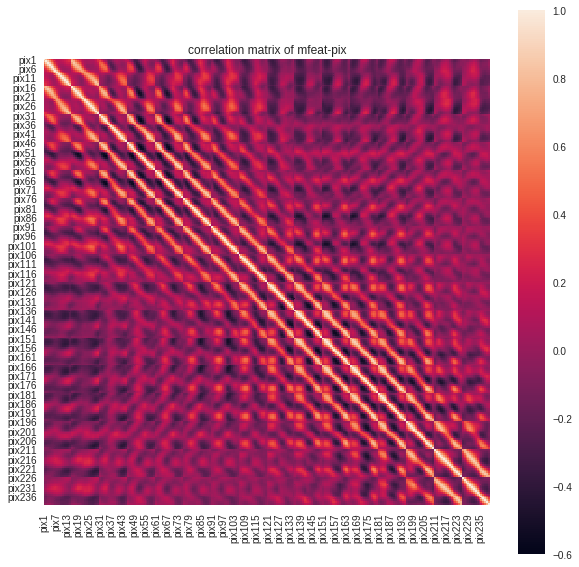

In [ ]:
plt.figure(figsize=(10,10)) #Correlation Matrix Mfeat-pix
covMatrix = mfeat_pixf.corr()
sn.heatmap(covMatrix,square=True)
plt.title('correlation matrix of mfeat-pix')
plt.show()

In [ ]:
scaler =StandardScaler()#standardization of data
mfeat_pix_std = scaler.fit_transform(mfeat_pix)

In [ ]:
model = PCA() #PCA for mfeat-pix
mfeat_pix_t=model.fit_transform(mfeat_pix_std)
mfeat_pix_t
mfeat_pix_tr = mfeat_pix_t[:,0:33]

In [ ]:
feature =range(model.n_components_)
explained_variance = pd.DataFrame(model.explained_variance_, columns =['Explained_var'])
explained_var_ratio = pd.DataFrame(model.explained_variance_ratio_, columns =['Explained_var'])
variance_df = pd.concat([explained_variance,explained_var_ratio],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df.head(33)
variance_df[0:33].sum()

Explained_var    204.316031
Explained_var      0.850891
dtype: float64

**From the above the number of component choosen is 33 with eigenvalue greater than 1.The 33 components explained 85.09% of the variance**

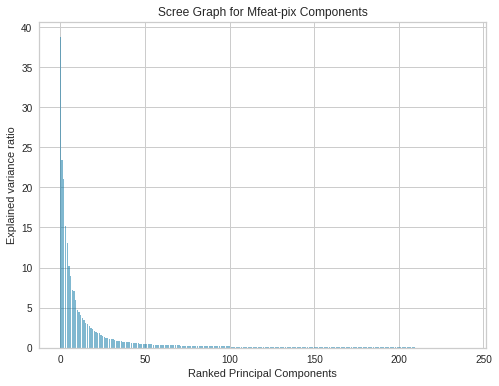

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(feature,model.explained_variance_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph for Mfeat-pix Components")
plt.show()

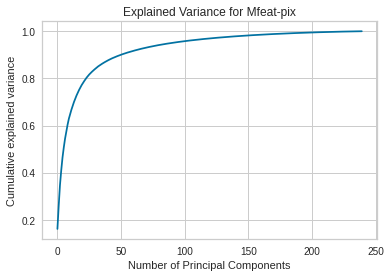

In [ ]:
fig = plt.figure(figsize=(6,4))#plot for cummulative explained variance
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance for Mfeat-pix')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

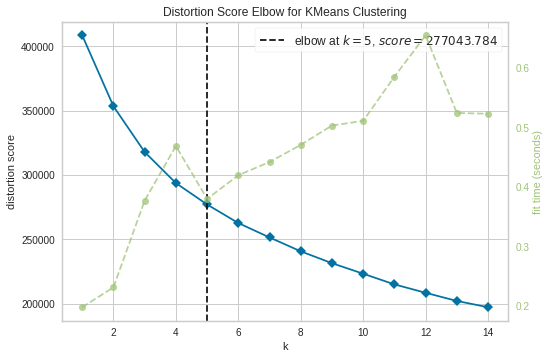

In [ ]:
model15 =KMeans()
elbow1 = KElbowVisualizer(model15,k=(1,15)).fit(mfeat_pix_tr)
elbow1.show()

In [ ]:
model1 = KMeans(n_clusters=5,random_state = 42, max_iter=300, n_init=10)#KMean model for Mfeat-pix
cluster1= model1.fit_predict(mfeat_pix_tr)
model1.labels_

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [ ]:
centroids = model1.cluster_centers_
model1.inertia_

277024.9281282956

In [ ]:
silhouette_score(mfeat_pix_tr,model1.labels_,metric = 'euclidean')

0.1381612070238521

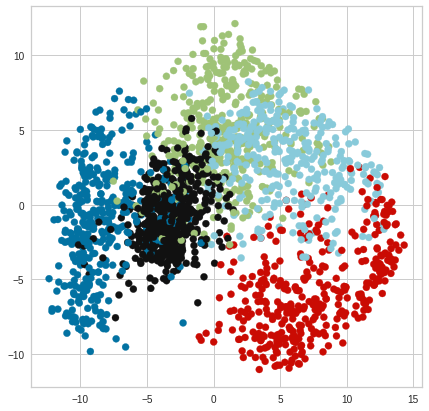

In [ ]:
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'c',4:'k',5:'m'}
label_color = [LABEL_COLOR_MAP[l] for l in cluster1]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(mfeat_pix_tr[:,0],mfeat_pix_tr[:,2], c= label_color, alpha=1)
plt.show()

In [ ]:
df = pd.DataFrame(mfeat_pix_tr)
df = df[[0,1,2]] # only want to visualise relationships between first 5 projections
df['cluster1'] = cluster1

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


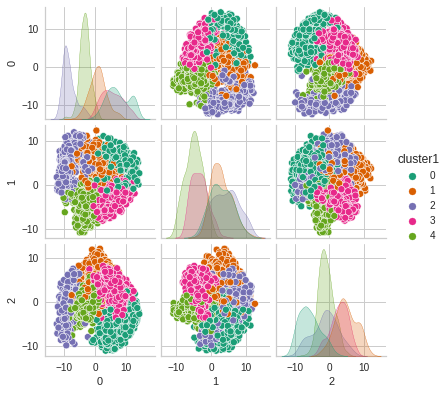

In [ ]:
sn.pairplot(df, hue='cluster1', palette= 'Dark2', diag_kind='kde',size=1.85)

In [ ]:
model1.cluster_centers_

array([[ 7.37941559e+00,  2.76970255e+00, -5.69263626e+00,
        -6.23597945e-02, -2.26480770e-01, -7.32051844e-01,
         2.95884851e-02,  6.04666793e-01,  7.74830257e-01,
        -4.44835863e-01,  4.00435689e-01,  1.67195736e-01,
        -3.82785908e-02, -3.07140667e-02,  1.43896519e-01,
        -2.83802848e-01,  2.55948086e-01, -1.06294572e-02,
        -7.23858962e-02, -1.61563904e-01, -1.96337791e-01,
        -5.05246595e-02, -1.00766081e-01, -8.24858287e-02,
        -2.58826114e-01,  1.06614718e-02,  1.69528724e-01,
         3.55932269e-02, -6.27494597e-02,  1.33905496e-01,
        -7.49922967e-02,  6.99882820e-02,  9.24587598e-03],
       [ 8.86836583e-01,  2.84755619e+00,  4.85569390e+00,
        -2.48864403e+00, -1.34829142e+00, -5.24730195e-01,
        -7.83266615e-01,  2.08603237e-01, -3.08154338e-01,
         5.44654117e-02,  7.21905817e-01, -1.37611008e-02,
        -4.97823767e-02,  3.43438507e-01, -1.53261471e-01,
         1.91798464e-01,  3.46179352e-01, -1.42465451e-

In [ ]:
m = pd.DataFrame(model1.cluster_centers_, columns= ['ccol'+str(i) for i in range(33)])
m['cluster mean']=m.mean(axis=1)
m

ccol0     ccol1     ccol2     ccol3     ccol4     ccol5     ccol6  \
0  7.379416  2.769703 -5.692636 -0.062360 -0.226481 -0.732052  0.029588   
1  0.886837  2.847556  4.855694 -2.488644 -1.348291 -0.524730 -0.783267   
2 -8.334474  4.121927 -1.096154  2.404650  0.794974  0.806318  1.159586   
3  5.497815 -3.415113  2.872458  2.710155  1.418072  1.079130  0.474204   
4 -3.274059 -5.023047 -0.898536 -1.477809 -0.262339 -0.352595 -0.552155   

      ccol7     ccol8     ccol9  ...    ccol24    ccol25    ccol26    ccol27  \
0  0.604667  0.774830 -0.444836  ... -0.258826  0.010661  0.169529  0.035593   
1  0.208603 -0.308154  0.054465  ...  0.003442 -0.074158 -0.011690  0.049211   
2 -0.518646 -0.072650 -0.512442  ... -0.064297 -0.048310 -0.014280 -0.033284   
3 -0.523310  0.351509  0.201674  ...  0.270485  0.093066 -0.021181 -0.111405   
4  0.126189 -0.469036  0.513825  ...  0.052359  0.027123 -0.085238  0.031715   

     ccol28    ccol29    ccol30    ccol31    ccol32  cluster mean  
0 -0.062749  0.133905 -0.074992  0.069988  0.009246      0.132490  
1 -0.019833 -0.218965 -0.050608  0.078141 -0.068294      0.140170  
2 -0.009738  0.074169 -0.015603  0.014090 -0.002933     -0.049164  
3  0.122918  0.026692  0.080881 -0.094636 -0.083787      0.326171  
4 -0.011869  0.008411  0.052198 -0.060597  0.103279     -0.375986  

[5 rows x 34 columns]

**Mfeat_mor BLOCK PCA AND CLUSTERING**

In [ ]:
mfeat_mor.shape

(2000, 6)

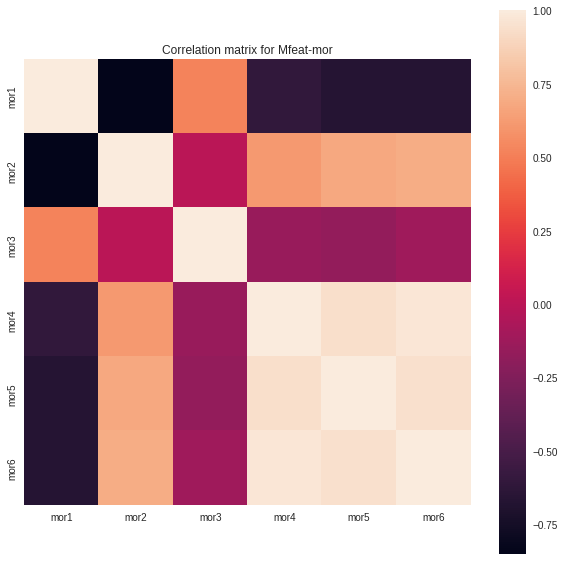

In [ ]:
plt.figure(figsize=(10,10))
covMatrix = mfeat_morf.corr()
sn.heatmap(covMatrix,square=True)
plt.title('Correlation matrix for Mfeat-mor')
plt.show()

In [ ]:
scaler =StandardScaler()
mfeat_mor_std = scaler.fit_transform(mfeat_mor)
model_mor = PCA()
mfeat_mor_t=model_mor.fit_transform(mfeat_mor_std)
mfeat_mor_t
mfeat_mor_tr = mfeat_mor_t[:,0:2]

In [ ]:
feature_mor =range(model_mor.n_components_)
explained_variance_mor = pd.DataFrame(model_mor.explained_variance_, columns =['Explained_var'])
explained_var_ratio_mor = pd.DataFrame(model_mor.explained_variance_ratio_, columns =['Explained_var'])
variance_df_mor = pd.concat([explained_variance_mor,explained_var_ratio_mor],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df_mor.head(2)
variance_df_mor[0:2].sum()

Explained_var    5.262123
Explained_var    0.876582
dtype: float64

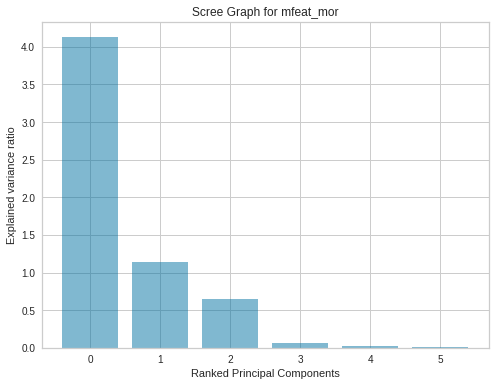

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(feature_mor,model_mor.explained_variance_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph for mfeat_mor")
plt.show()

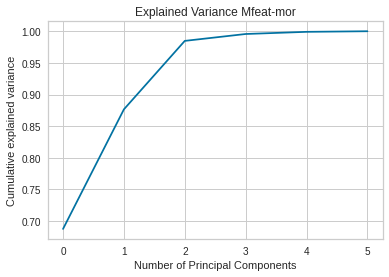

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(np.cumsum(model_mor.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Mfeat-mor')
plt.show()

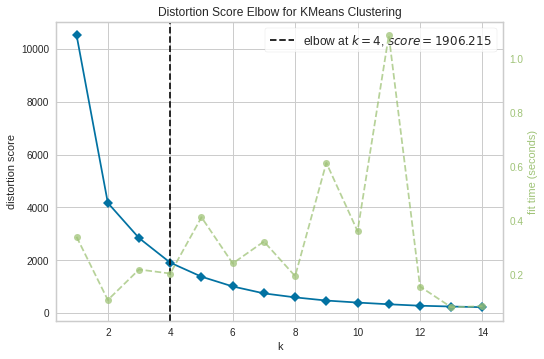

In [ ]:
#Determining the best value of K to use using KElbow plot
model15 =KMeans()
elbow2 = KElbowVisualizer(model15,k=(1,15)).fit(mfeat_mor_tr)
elbow2.show()

In [ ]:
#KMean model
model2 = KMeans(n_clusters=4,random_state = 42, max_iter=100, n_init=10)
cluster1= model2.fit_predict(mfeat_mor_tr)
model2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
xcentroids = model2.cluster_centers_
model2.inertia_

1906.46660446873

In [ ]:
silhouette_score(mfeat_mor_tr,model2.labels_ )#cheking the level of how dense is the cluster

0.46996775422294984

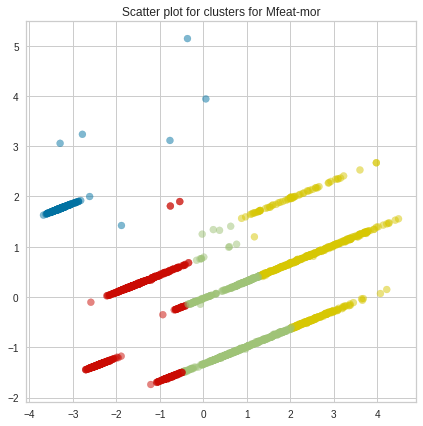

In [ ]:
LABEL_COLOR_MAP2 = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color2 = [LABEL_COLOR_MAP2[l] for l in cluster1]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(mfeat_mor_tr[:,0],mfeat_mor_tr[:,1], c= label_color2, alpha=0.5)
plt.title('Scatter plot for clusters for Mfeat-mor')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


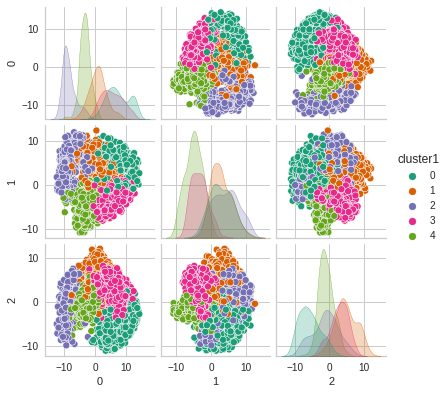

In [ ]:
df1 = pd.DataFrame(mfeat_mor_tr)
df1 = df1[[0,1]] # only want to visualise relationships between first projections
df1['cluster1'] = cluster1
sn.pairplot(df, hue='cluster1', palette= 'Dark2', diag_kind='kde',size=1.85)

In [ ]:
mfeat_mor_h = hierarchy.linkage(mfeat_mor_tr, method ='complete')
plt.figure()
dn_mor = hierarchy.dendrogram(mfeat_mor_h,truncate_mode = 'lastp')

NameError: ignored

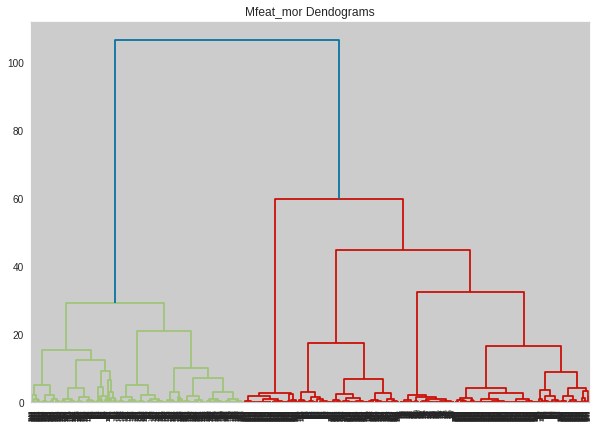

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Mfeat_mor Dendograms")
dend = shc.dendrogram(shc.linkage(mfeat_mor_tr, method='ward'))

## **Mfeat-fac PCA and clustering**

In [ ]:
mfeat_fac.shape

(2000, 216)

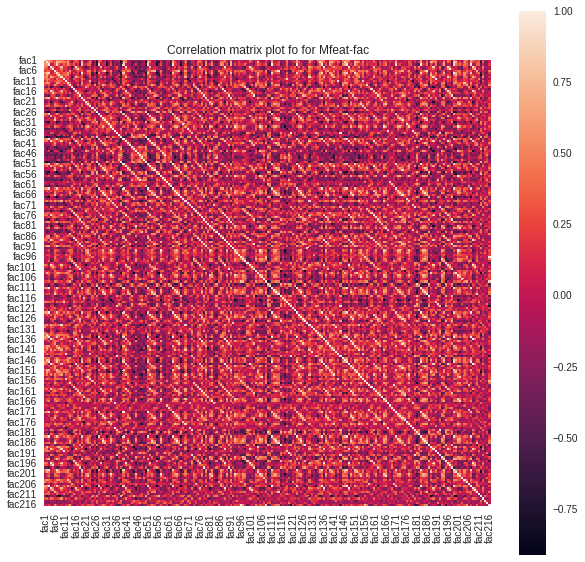

In [ ]:
plt.figure(figsize=(10,10))
covMatrix = mfeat_facf.corr()
sn.heatmap(covMatrix,square=True)
plt.title('Correlation matrix plot fo for Mfeat-fac')
plt.show()

In [ ]:
scaler =StandardScaler()#Data standardization
mfeat_fac_std = scaler.fit_transform(mfeat_fac)
model_fac = PCA()
mfeat_fac_t=model_fac.fit_transform(mfeat_fac_std)
mfeat_fac_tr = mfeat_fac_t[:,0:23]
mfeat_fac_tr

array([[-6.7787959 , -7.63151591, -5.50154376, ..., -0.3803338 ,
         0.65667176, -0.5880953 ],
       [-4.75550231, -8.55026867, -3.30241962, ..., -0.23099416,
         0.82993521,  0.1434025 ],
       [-7.43552137, -8.83275339, -2.21304474, ...,  0.0736686 ,
         0.73342521, -0.53765764],
       ...,
       [ 4.17896406, -5.86069348,  2.87097132, ...,  1.39958302,
         0.95133886, -0.08491472],
       [ 2.87632503, -8.83458082,  5.4222979 , ...,  0.60461923,
         1.23824182,  1.6165672 ],
       [ 9.70931137, -1.02173414, -2.39377472, ..., -0.99746384,
        -0.72702431, -1.00001746]])

In [ ]:
feature_fac =range(model_fac.n_components_)
explained_variance_fac = pd.DataFrame(model_fac.explained_variance_, columns =['Explained_var'])
explained_var_ratio_fac = pd.DataFrame(model_fac.explained_variance_ratio_, columns =['Explained_var'])
variance_df_fac = pd.concat([explained_variance_fac,explained_var_ratio_fac],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df_fac.head(23)
variance_df_fac[0:23].sum()

Explained_var    200.391745
Explained_var      0.927276
dtype: float64

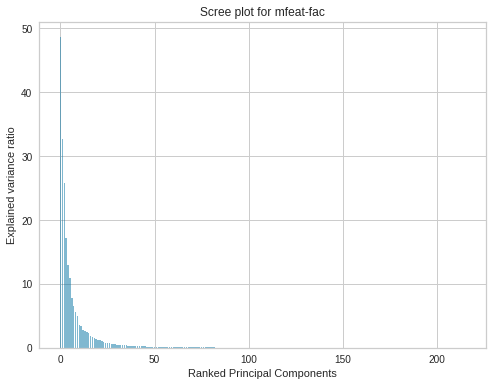

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(feature_fac,model_fac.explained_variance_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree plot for mfeat-fac")
plt.show()

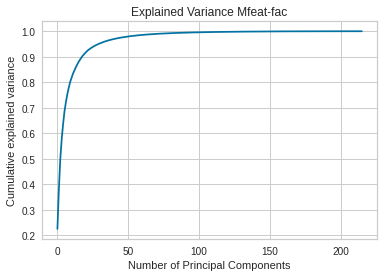

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(np.cumsum(model_fac.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Mfeat-fac')
plt.show()

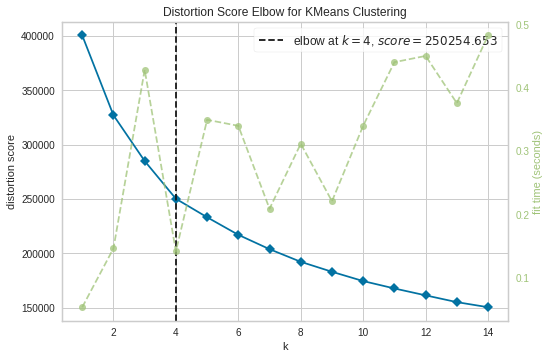

In [ ]:
model14 =KMeans()
elbow3 = KElbowVisualizer(model14,k=(1,15)).fit(mfeat_fac_tr)
elbow3.show()

In [ ]:
model3 = KMeans(n_clusters=4,random_state = 42, max_iter=300, n_init=10)
cluster3= model3.fit_predict(mfeat_fac_tr)
model3.labels_

array([3, 3, 3, ..., 0, 0, 2], dtype=int32)

In [ ]:
model3.inertia_

250254.23327200103

In [ ]:
centroids3 = model3.cluster_centers_
model3.inertia_
silhouette_score(mfeat_fac_tr,model3.labels_ )

0.19774385734345493

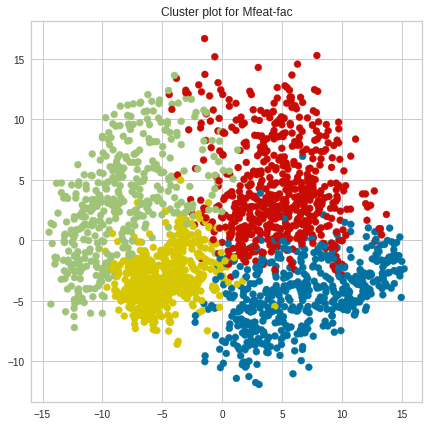

In [ ]:
LABEL_COLOR_MAP3 = {0 : 'r',1 : 'g',2 : 'b',3:'y',4:'m'}
label_color3 = [LABEL_COLOR_MAP3[l] for l in cluster3]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(mfeat_fac_tr[:,0],mfeat_fac_tr[:,2], c= label_color3, alpha=1)
plt.title('Cluster plot for Mfeat-fac')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


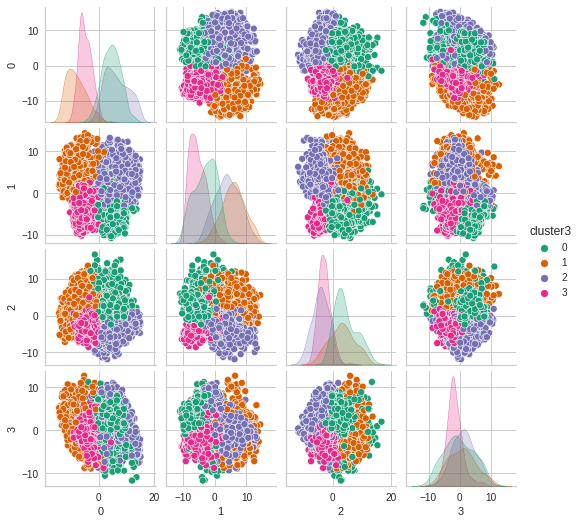

In [ ]:
df2 = pd.DataFrame(mfeat_fac_tr)
df2 = df2[[0,1,2,3]] # only want to visualise relationships between first projections
df2['cluster3'] = cluster3
sn.pairplot(df2, hue='cluster3', palette= 'Dark2', diag_kind='kde',size=1.85)

In [ ]:
mfeat_fac_h = hierarchy.linkage(mfeat_fac_tr, 'complete')
plt.figure()
dn_fac = hierarchy.dendrogram(mfeat_fac_h)

# **Mfeat-fou PCA and clustering**

In [ ]:
mfeat_fou.shape

(2000, 76)

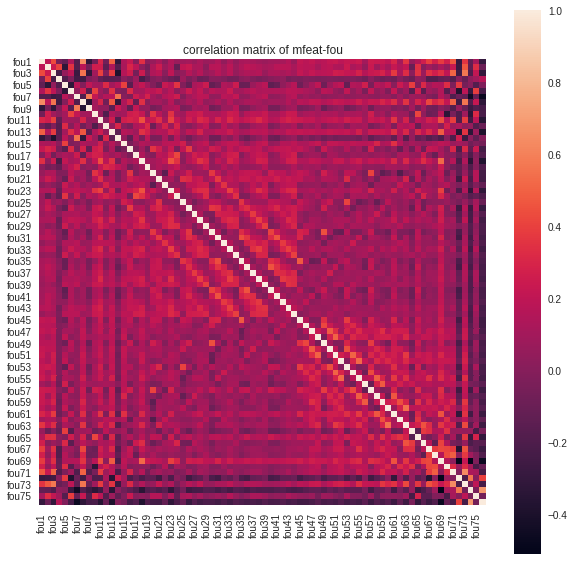

In [ ]:
plt.figure(figsize=(10,10))
covMatrix = mfeat_fouf.corr()
sn.heatmap(covMatrix,square=True)
plt.title('correlation matrix of mfeat-fou')
plt.show()

**The mfeat_fou data was standardized and the principal components components was calculated**

In [ ]:
scaler =StandardScaler()
mfeat_fou_std = scaler.fit_transform(mfeat_fou)
model_fou = PCA()
mfeat_fou_t=model_fou.fit_transform(mfeat_fou_std)
mfeat_fou_tr = mfeat_fou_t[:,0:20]
mfeat_fou_tr

array([[-3.49599128, -3.47793621,  1.17321002, ..., -1.25533346,
        -0.17189567,  2.5810509 ],
       [-6.10418037, -4.8616601 ,  1.46004411, ..., -0.03355461,
         0.13970694, -0.07953586],
       [-5.80788646, -4.9469388 ,  0.41406823, ...,  0.01776179,
        -0.49389522, -1.18483815],
       ...,
       [ 3.38308782, -3.71727628, -0.18764651, ..., -0.72900946,
         0.92935732, -0.48770204],
       [ 1.48119561, -1.00702109, -1.60350325, ...,  0.04261656,
        -0.8889018 ,  0.70766882],
       [ 0.22584946,  1.50856269, -1.34827983, ...,  0.12157647,
        -0.17137633, -1.00836102]])

In [ ]:
feature_fou =range(model_fou.n_components_)
explained_variance_fou = pd.DataFrame(model_fou.explained_variance_, columns =['Explained_var'])
explained_var_ratio_fou = pd.DataFrame(model_fou.explained_variance_ratio_, columns =['Explained_var'])
variance_df_fou = pd.concat([explained_variance_fou,explained_var_ratio_fou],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df_fou.head(20).sum ,    variance_df_fou[:20].sum()

(<bound method NDFrame._add_numeric_operations.<locals>.sum of     Explained_var  Explained_var
 0       11.877394       0.156203
 1        5.191004       0.068269
 2        4.751920       0.062494
 3        2.758027       0.036272
 4        2.536930       0.033364
 5        2.431228       0.031974
 6        2.173024       0.028578
 7        2.021166       0.026581
 8        1.904066       0.025041
 9        1.733189       0.022794
 10       1.630638       0.021445
 11       1.590459       0.020917
 12       1.497393       0.019693
 13       1.445510       0.019010
 14       1.359840       0.017884
 15       1.334330       0.017548
 16       1.203811       0.015832
 17       1.120033       0.014730
 18       1.068584       0.014053
 19       1.051263       0.013825>, Explained_var    50.679811
 Explained_var     0.666506
 dtype: float64)

From the above table, we see that the number of eigenvalues greater than 1 is 20 (by kaiser rule). That means our data was reduced to 20 components. Clustering will be performed on the 20 components to further examine the partern in the data. 

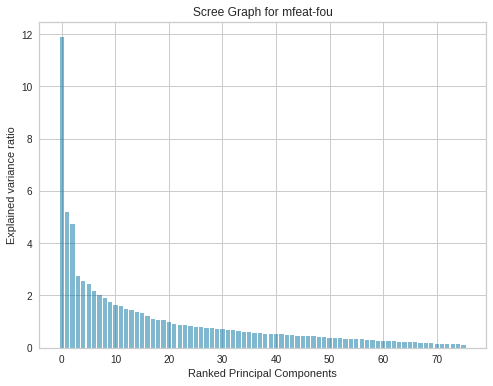

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(feature_fou,model_fou.explained_variance_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph for mfeat-fou")
plt.show()

The principal components plot 

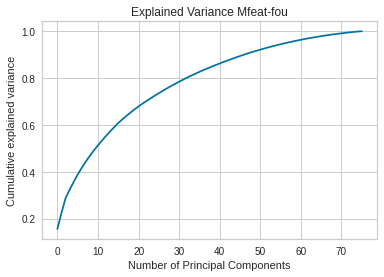

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(np.cumsum(model_fou.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Mfeat-fou')
plt.show()

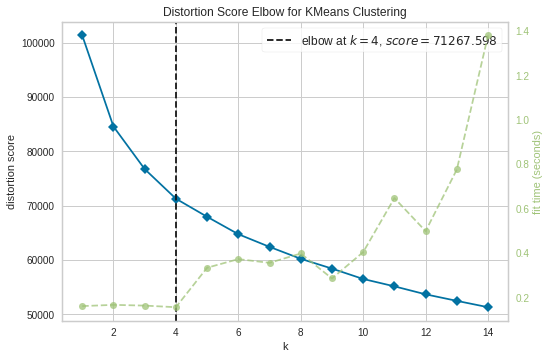

In [ ]:
model13 =KMeans()
elbow4 = KElbowVisualizer(model13,k=(1,15)).fit(mfeat_fou_tr)
elbow4.show()

In [ ]:
model4 = KMeans(n_clusters=2,random_state = 42, max_iter=300, n_init=10)
cluster4= model4.fit_predict(mfeat_fou_tr)
model4.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
centroids4 = model4.cluster_centers_
model4.inertia_
silhouette_score(mfeat_fou_tr,model4.labels_ )

0.14427728691064448

In [ ]:
centroids4

array([[-3.62171266e+00,  2.11097787e-01, -3.03263786e-02,
         4.37088173e-03,  1.23621774e-01, -5.60289271e-03,
        -9.99270627e-02,  2.84856218e-01,  3.73508160e-02,
         1.69544241e-02,  8.43529857e-02,  4.99135848e-02,
        -2.47215871e-04, -1.66169961e-02,  9.67493149e-02,
         5.11569875e-02, -1.99888214e-02, -7.54081208e-02,
         1.09992863e-01,  1.52534803e-01],
       [ 2.27684216e+00, -1.32709684e-01,  1.90651175e-02,
        -2.74781815e-03, -7.77166204e-02,  3.52233972e-03,
         6.28205964e-02, -1.79078990e-01, -2.34811319e-02,
        -1.06586445e-02, -5.30297271e-02, -3.13788986e-02,
         1.55415841e-04,  1.04465155e-02, -6.08228592e-02,
        -3.21605817e-02,  1.25662623e-02,  4.74064082e-02,
        -6.91486074e-02, -9.58932147e-02]])

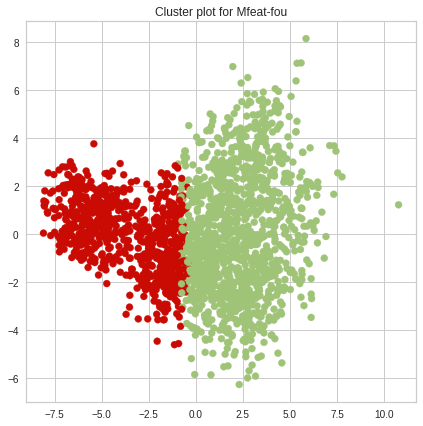

In [ ]:
LABEL_COLOR_MAP4 = {0 : 'r',1 : 'g',2:'b',3:'y',4:'m',5:'c',6:'k'}
label_color4 = [LABEL_COLOR_MAP4[l] for l in cluster4]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(mfeat_fou_tr[:,0],mfeat_fou_tr[:,2], c= label_color4, alpha=1)
plt.title('Cluster plot for Mfeat-fou')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


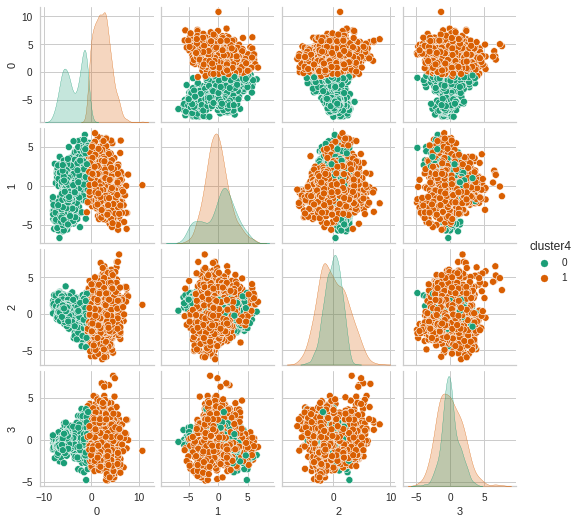

In [ ]:
df3 = pd.DataFrame(mfeat_fou_tr)
df3 = df3[[0,1,2,3]] # only want to visualise relationships between first projections
df3['cluster4'] = cluster4
sn.pairplot(df3, hue='cluster4', palette= 'Dark2', diag_kind='kde',size=1.85)

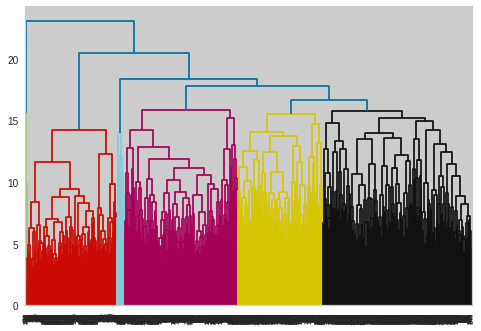

In [ ]:
mfeat_fou_h = hierarchy.linkage(mfeat_fou_tr, 'complete')
plt.figure()
dn_fou = hierarchy.dendrogram(mfeat_fou_h)

#**Mfeat_kar PCA AND CLUSTER**

In [ ]:
mfeat_kar.shape

(2000, 64)

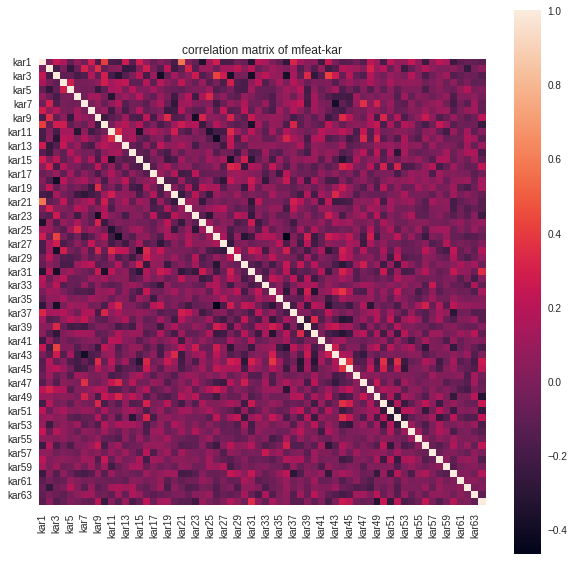

In [ ]:
plt.figure(figsize=(10,10))
covMatrix = mfeat_karf.corr()
sn.heatmap(covMatrix,square=True)
plt.title('correlation matrix of mfeat-kar')
plt.show()

In [ ]:
scaler =StandardScaler()
mfeat_kar_std = scaler.fit_transform(mfeat_kar)
model_kar = PCA()
mfeat_kar_t=model_kar.fit_transform(mfeat_kar_std)
mfeat_kar_tr = mfeat_kar_t[:,0:21]
mfeat_kar_tr

array([[ 0.6505778 , -0.79597584,  1.35570179, ..., -2.0679122 ,
        -0.01992707, -0.06312792],
       [ 2.01185965, -0.26421083,  0.31298565, ..., -0.61379443,
        -0.31705567,  0.63591921],
       [-1.91389767, -1.29495449,  0.16403092, ..., -1.56258752,
        -0.53293818, -2.26704831],
       ...,
       [-3.89252606,  1.03467622,  0.43232166, ...,  0.04524388,
         1.1216645 , -0.55670734],
       [-1.08027063,  0.1542758 ,  0.33708873, ...,  0.33889343,
        -0.66526745,  0.93243303],
       [-2.21980346, -0.39076076, -0.33017336, ..., -0.11883999,
         0.73365578, -1.02549217]])

In [ ]:
feature_kar =range(model_kar.n_components_)
explained_variance_kar = pd.DataFrame(model_kar.explained_variance_, columns =['Explained_var'])
explained_var_ratio_kar = pd.DataFrame(model_kar.explained_variance_ratio_, columns =['Explained_var'])
variance_df_kar = pd.concat([explained_variance_kar,explained_var_ratio_kar],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df_kar.head(21)
variance_df_kar[:20].sum()

Explained_var    42.314268
Explained_var     0.660830
dtype: float64

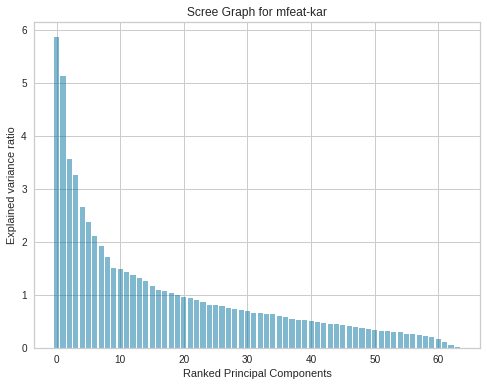

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(feature_kar,model_kar.explained_variance_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph for mfeat-kar")
plt.show()

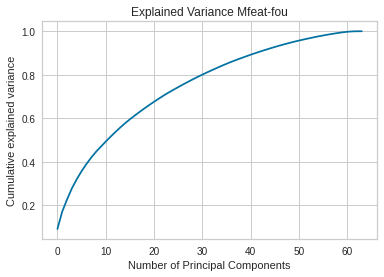

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(np.cumsum(model_kar.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Mfeat-fou')
plt.show()

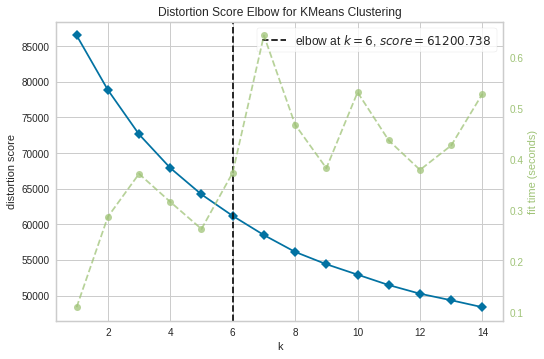

In [ ]:
model12 =KMeans()
elbow5 = KElbowVisualizer(model12,k=(1,15)).fit(mfeat_kar_tr)
elbow5.show()

In [ ]:
model5 = KMeans(n_clusters=6,random_state = 42, max_iter=300, n_init=10)
cluster5= model5.fit_predict(mfeat_kar_tr)
model5.labels_

array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

In [ ]:
centroids5 = model5.cluster_centers_
model5.inertia_
silhouette_score(mfeat_kar_tr,model5.labels_ )

0.11429905228046207

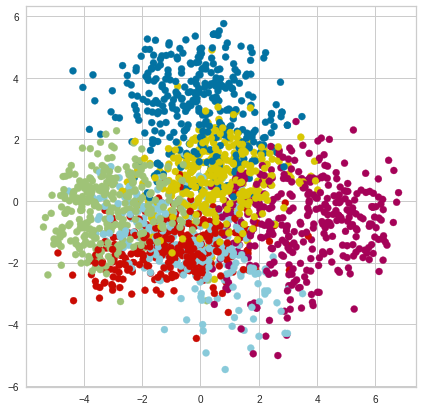

In [ ]:
LABEL_COLOR_MAP5 = {0 : 'r',1 : 'g',2:'b',3:'y',4:'m',5:'c',6:'k'}
label_color5 = [LABEL_COLOR_MAP5[l] for l in cluster5]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(mfeat_kar_tr[:,0],mfeat_kar_tr[:,2], c= label_color5, alpha=1) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


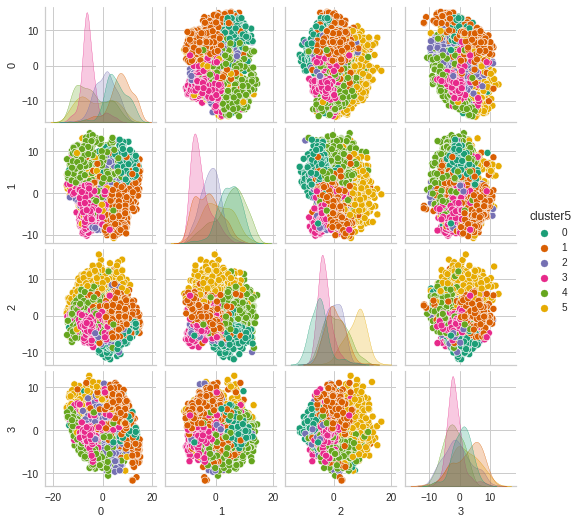

In [ ]:
df3 = pd.DataFrame(mfeat_fac_tr)
df3 = df3[[0,1,2,3]] # only want to visualise relationships between first projections
df3['cluster5'] = cluster5
sn.pairplot(df3, hue='cluster5', palette= 'Dark2', diag_kind='kde',size=1.85)

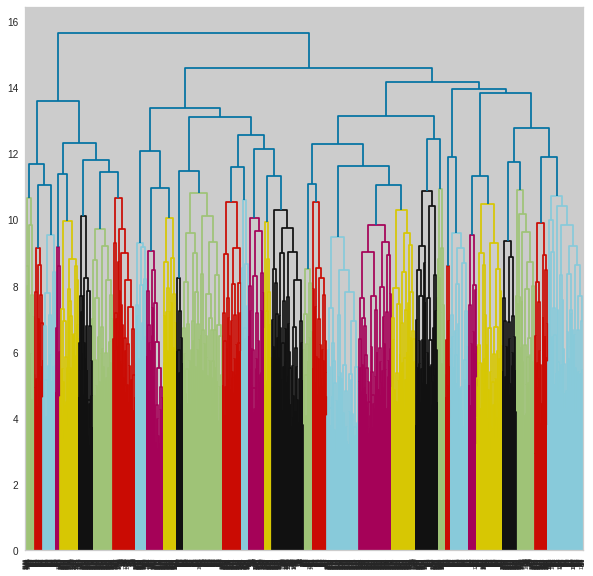

In [ ]:
mfeat_kar_h = hierarchy.linkage(mfeat_kar_tr, 'complete')
plt.figure(figsize=(10,10))
dn_kar = hierarchy.dendrogram(mfeat_kar_h)

## **mfeat_zer PCA AND CLUSTERING**

In [ ]:
mfeat_zer.shape

(2000, 47)

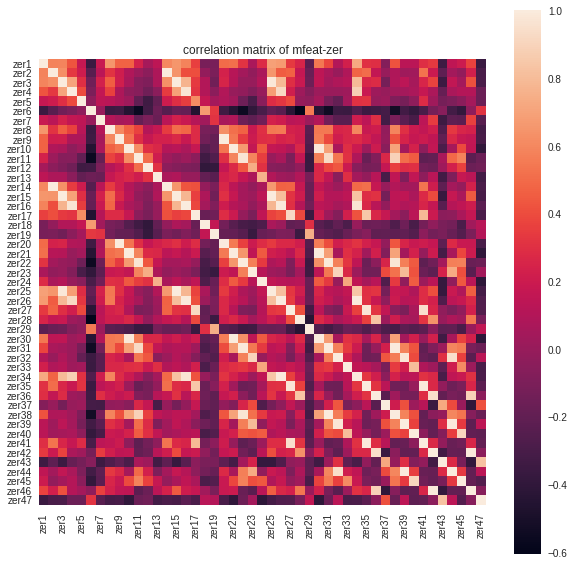

In [ ]:
plt.figure(figsize=(10,10))
covMatrix = mfeat_zerf.corr()
sn.heatmap(covMatrix,square=True)
plt.title('correlation matrix of mfeat-zer')
plt.show()

In [ ]:
scaler =StandardScaler()
mfeat_zer_std = scaler.fit_transform(mfeat_zer)
model_zer = PCA()
mfeat_zer_t=model_zer.fit_transform(mfeat_zer_std)
mfeat_zer_tr = mfeat_zer_t[:,0:11]
mfeat_zer_tr

array([[-5.32192484,  1.10606473,  0.82255732, ...,  0.58198439,
         0.61747186,  0.77550232],
       [-4.74141091, -0.11103351,  0.08982512, ..., -2.31955212,
         0.65207536,  0.68913709],
       [-5.92586836,  1.52299376, -0.0656367 , ..., -2.85548448,
         1.47751922,  1.03062617],
       ...,
       [-3.01152006, -1.98609059, -0.59007757, ...,  0.6139576 ,
         0.48113269, -0.73685029],
       [-4.6534707 , -4.74850808,  1.17110459, ...,  0.03270175,
        -0.11763704, -1.67955708],
       [-1.48050666, -2.85728581, -2.48836488, ..., -0.0275011 ,
         1.16725238, -0.34849151]])

In [ ]:
feature_zer =range(model_zer.n_components_)
explained_variance_zer = pd.DataFrame(model_zer.explained_variance_, columns =['Explained_var'])
explained_var_ratio_zer = pd.DataFrame(model_zer.explained_variance_ratio_, columns =['Explained_var'])
variance_df_zer = pd.concat([explained_variance_zer,explained_var_ratio_zer],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df_zer.head(11)
variance_df_zer[:11].sum()

Explained_var    41.674995
Explained_var     0.886259
dtype: float64

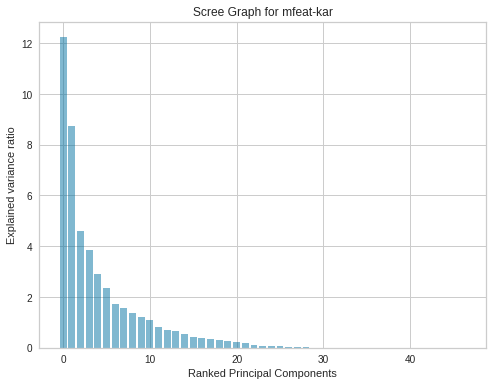

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(feature_zer,model_zer.explained_variance_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph for mfeat-kar")
plt.show()

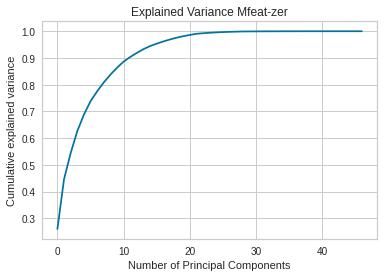

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(np.cumsum(model_zer.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Mfeat-zer')
plt.show()

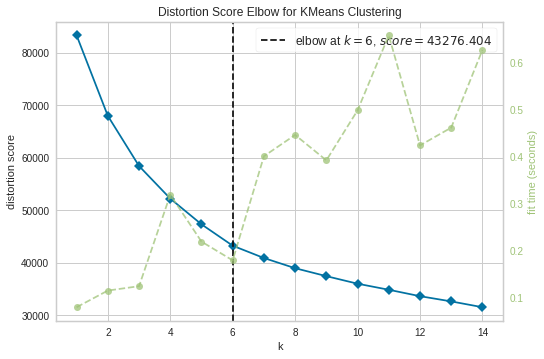

In [ ]:
model11 =KMeans()
elbow6 = KElbowVisualizer(model11,k=(1,15)).fit(mfeat_zer_tr)
elbow6.show()

In [ ]:
model6 = KMeans(n_clusters=6,random_state = 42, max_iter=1000, n_init=20)
cluster6= model6.fit_predict(mfeat_zer_tr)
model6.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [ ]:
centroids6 = model6.cluster_centers_
model6.inertia_
silhouette_score(mfeat_zer_tr,model6.labels_ )

0.18555107146981883

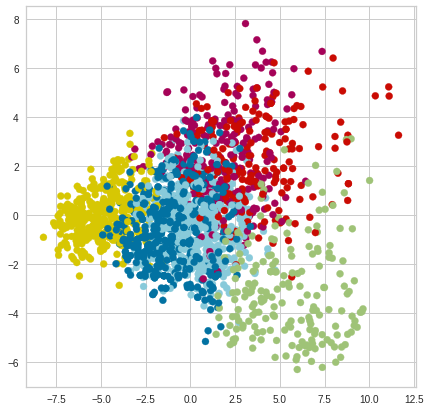

In [ ]:
LABEL_COLOR_MAP6 = {0 : 'r',1 : 'g',2:'b',3:'y',4:'m',5:'c',6:'k'}
label_color6 = [LABEL_COLOR_MAP6[l] for l in cluster6]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(mfeat_zer_tr[:,0],mfeat_zer_tr[:,2], c= label_color6, alpha=1) 
plt.show()

In [ ]:
mfeat_zer_h = hierarchy.linkage(mfeat_zer_tr, 'complete')
plt.figure(figsize=(10,10))
dn_zer = hierarchy.dendrogram(mfeat_zer_h)

### **COMBINED DATA PCA AND CLUSTERING**

In [ ]:
mfeat = pd.concat([mfeat_mor,mfeat_fac,mfeat_fou,mfeat_kar,mfeat_pix,mfeat_zer],axis=1, join='inner') #The 6 blocks were joined to form the whole data

In [ ]:
mfeat_f= mfeat.astype(float) #convert the combined data to float

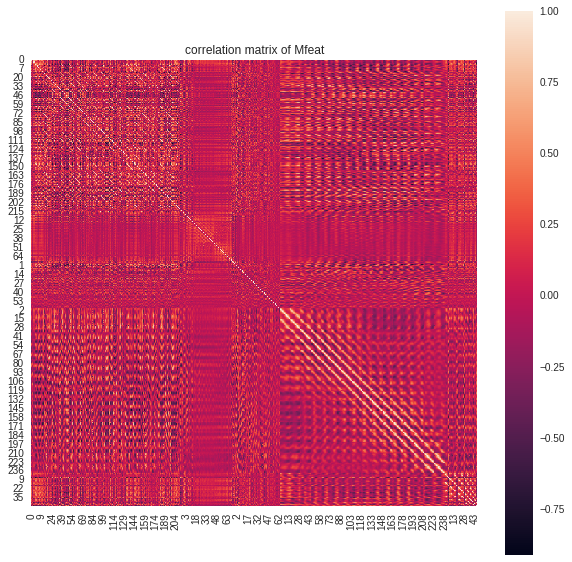

In [ ]:
plt.figure(figsize=(10,10))
covMatrix = mfeat_f.corr()
sn.heatmap(covMatrix,square=True)
plt.title('correlation matrix of Mfeat')
plt.show()

In [ ]:
mfeat.shape

(2000, 649)

**The combined value was standardized to put all the variable in the same scale of variance and the principal components were fitted**

In [ ]:
scaler =StandardScaler()
mfeat_std = scaler.fit_transform(mfeat)
model_c = PCA()
mfeat_tr=model_c.fit_transform(mfeat_std)
mfeat_tr

array([[-1.07925866e+01, -1.42172293e+01, -2.73584020e+00, ...,
        -2.85269168e-15, -5.02180661e-17, -2.25910337e-16],
       [-8.03070714e+00, -1.30842271e+01,  1.29048430e+00, ...,
         1.42329890e-15, -1.48612705e-15, -1.13433347e-15],
       [-1.18567321e+01, -1.23750207e+01,  4.99916916e-01, ...,
         3.47789010e-15,  6.01015650e-16,  3.03798745e-16],
       ...,
       [ 3.09190867e+00, -7.74901482e+00,  7.40962248e+00, ...,
         2.95481682e-16, -4.87328016e-16,  7.69684403e-16],
       [ 1.47821614e-02, -8.77546640e+00,  1.20996081e+01, ...,
         3.43945151e-15, -3.82902971e-16, -1.13202982e-15],
       [ 1.30182588e+01, -5.32983056e+00,  8.80182706e-01, ...,
        -2.39996206e-15,  9.07617015e-17,  1.69084187e-16]])

In [ ]:
feature_c =range(model_c.n_components_)  #we determine the number of components to choose 
explained_variance_c = pd.DataFrame(model_c.explained_variance_, columns =['Explained_var'])
explained_var_ratio_c = pd.DataFrame(model_c.explained_variance_ratio_, columns =['Explained_var'])
variance_df_c = pd.concat([explained_variance_c,explained_var_ratio_c],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df_c.head(77)
variance_df_c[:77].sum()

Explained_var    571.344237
Explained_var      0.879905
dtype: float64

From the above table, we see that the number of eigenvalues greater than 1 is 77 (by kaiser rule). That means our data was reduced to 77 components. Clustering will be performed on the 77 components to further examine the partern in the data.The 77 components explained 87.9% of the total variance

In [ ]:
mfeat_cc =variance_df_c.iloc[0:77] #creating new variable with 77 components
mfeat_cc

Explained_var  Explained_var
0       96.081106       0.147971
1       65.131633       0.100307
2       55.155668       0.084943
3       36.371264       0.056014
4       31.521917       0.048546
..            ...            ...
72       1.048446       0.001615
73       1.040550       0.001603
74       1.031695       0.001589
75       1.007942       0.001552
76       1.003700       0.001546

[77 rows x 2 columns]

**Components Plot**

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(feature_c,model_c.explained_variance_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph for mfeat-kar")
plt.show()

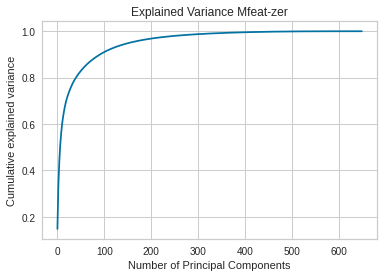

In [ ]:
fig = plt.figure(figsize=(6,4)) #Cumulative Explained variace plot
plt.plot(np.cumsum(model_c.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Mfeat')
plt.show()

**The number of clusters for the Kmean of the combined data was determined using the Elbow plot and 5 was choosing as seen below in the plot.**

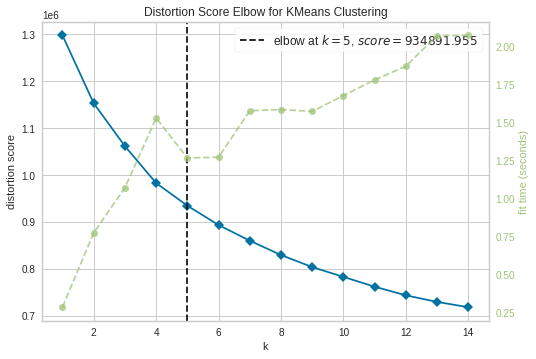

In [ ]:
model =KMeans()
elbow7 = KElbowVisualizer(model,k=(1,15)).fit(mfeat_tr)
elbow7.show()

In [ ]:
model7 = KMeans(n_clusters=5,random_state = 42, max_iter=1000, n_init=20)
cluster7= model7.fit_predict(mfeat_tr)
model7.labels_

array([2, 2, 2, ..., 4, 4, 4], dtype=int32)

The Kmean model was used to cluster the combined data by specifiying 5 clusters as determined by the Elbow plot above

In [ ]:
centroids7 = model7.cluster_centers_
model7.inertia_
silhouette_score(mfeat_tr,model7.labels_ )

0.12866528214975134

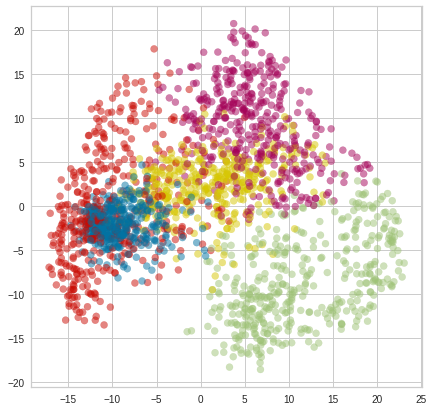

In [ ]:
LABEL_COLOR_MAP7 = {0 : 'r',1 : 'g',2:'b',3:'y',4:'m',5:'c',6:'k'}
label_color7 = [LABEL_COLOR_MAP7[l] for l in cluster7]

# Plot the scatter digram for the clusters
plt.figure(figsize = (7,7))
plt.scatter(mfeat_tr[:,0],mfeat_tr[:,2], c= label_color7, alpha=0.5) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


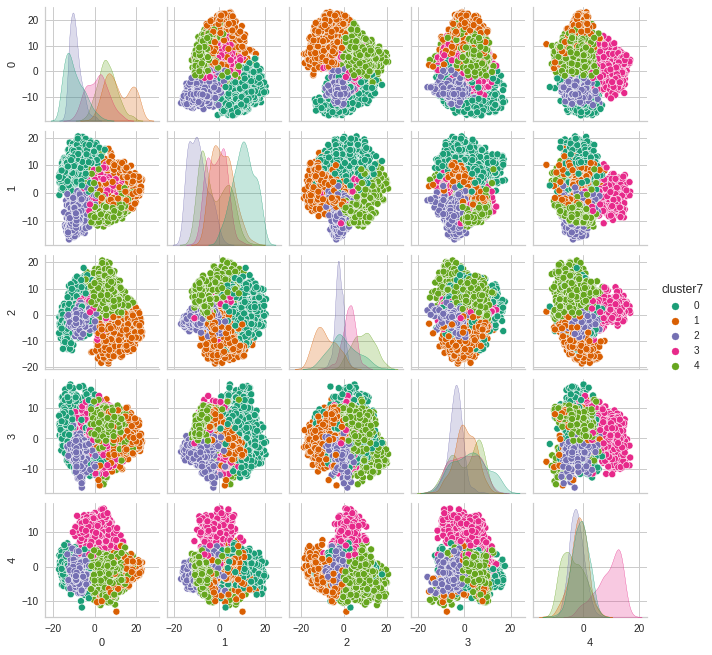

In [ ]:
df7 = pd.DataFrame(mfeat_tr)
df7 = df7[[0,1,2,3,4]] # only want to visualise relationships between first projections
df7['cluster7'] = cluster7
sn.pairplot(df7, hue='cluster7', palette= 'Dark2', diag_kind='kde',size=1.85)

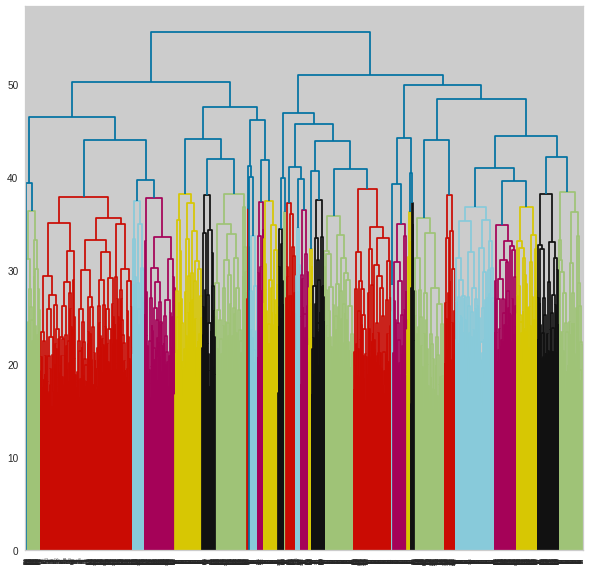

In [ ]:
mfeat_c_h = hierarchy.linkage(mfeat_tr, 'complete')
plt.figure(figsize=(10,10))
dn_c = hierarchy.dendrogram(mfeat_c_h,leaf_font_size=3)

## Supervised mining

In [ ]:
mfeat_t = mfeat_tr[:,0:77]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
C1=['0' for j in range(200) ]
C2=['1' for j in range(200) ]
C3=['2' for j in range(200) ]
C4=['3' for j in range(200) ]
C5=['4' for j in range(200) ]
C6=['5' for j in range(200) ]
C7=['6' for j in range(200) ]
C8=['7' for j in range(200) ]
C9=['8' for j in range(200) ]
C10=['9' for j in range(200)]
        
Y=np.array(C1 + C2+C3 +C4+C5+C6+C7+C8+C9+C10)

In [ ]:
mfeat_train,mfeat_test,y_train,y_test = train_test_split(mfeat,Y,test_size=0.2,random_state=42)

# **Linear Discriminant Analysis**

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(mfeat_train,y_train)
y_clf_pred = clf.predict(mfeat_test)

In [ ]:
print('Prediction accuracy for the test Linear Discriminant Analysis model')
print('{:.2%}'.format(accuracy_score(y_test,y_clf_pred)))

Prediction accuracy for the test Linear Discriminant Analysis model
98.50%


In [ ]:
print('Confusion Matrix of the LDA-classifier')
print(confusion_matrix(y_test, y_clf_pred))
print('Classification report LDA-classifier')
print(classification_report(y_test,y_clf_pred))

Confusion Matrix of the LDA-classifier
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  1  0  0]
 [ 0  1  0 34  0  1  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  2  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  0  0  0  0  0  0  0 47  1]
 [ 0  0  0  0  0  0  0  0  0 42]]
Classification report LDA-classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.98      1.00      0.99        47
           2       1.00      0.98      0.99        46
           3       0.94      0.94      0.94        36
           4       1.00      1.00      1.00        34
           5       0.97      0.94      0.96        34
           6       1.00      1.00      1.00        33
           7       0.98      1.00      0.99        44
           8       1.00      0.98      0.99        48
           9       0.98      1.00      0.99        4

**The linear discriminant Analysis model gave us an accuracy of 98%, recall of 98% nad precision of 98%.**

# **K-Nearest Neighbors (KNN)**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree')
KNN.fit(mfeat_train, y_train)
y_pred_KNN =KNN.predict(mfeat_test)

In [ ]:
print('Prediction accuracy for K-Nearest Neighbors (KNN)')
print('{:.2%}\n'.format(accuracy_score(y_test, y_pred_KNN)))

print('Confusion Matrix of K-Nearest Neighbors (KNN)')
print(confusion_matrix(y_test,y_pred_KNN))

print('Classification report K-Nearest Neighbors (KNN)')
print(classification_report(y_test,y_pred_KNN))

Prediction accuracy for K-Nearest Neighbors (KNN)
94.50%

Confusion Matrix of K-Nearest Neighbors (KNN)
[[35  0  0  0  0  1  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  1  0  0]
 [ 0  1  2 30  0  2  0  1  0  0]
 [ 0  1  0  0 32  0  1  0  0  0]
 [ 0  0  2  4  1 27  0  0  0  0]
 [ 0  1  0  0  1  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  1  1  0  0  0  0  0 46  0]
 [ 0  1  0  0  0  0  0  0  0 41]]
Classification report K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.90      1.00      0.95        47
           2       0.90      0.98      0.94        46
           3       0.88      0.83      0.86        36
           4       0.94      0.94      0.94        34
           5       0.90      0.79      0.84        34
           6       0.97      0.94      0.95        33
           7       0.96      1.00      0.98        44
           8       1.00      0

**The K-Nearest Neighbor model gave us an accuracy of 94%, recall of 94% nad precision of 94%**

# **Classification Task with Random Forest Classifier**



In [ ]:
RFC = RandomForestClassifier(n_estimators=100, max_depth=100,min_samples_split=2, random_state=42)
RFC.fit(mfeat_train,y_train)
RFC_pred = RFC.predict(mfeat_test)

In [ ]:
print('Prediction accuracy for Random Forest Classifier')
print('{:.2%}\n'.format(accuracy_score(y_test, RFC_pred)))

print('Confusion Matrix for Random Forest Classifier')
print(confusion_matrix(y_test,RFC_pred))

print('Classification report for Random Forest Classifier')
print(classification_report(y_test,RFC_pred))

Prediction accuracy for Random Forest Classifier
98.00%

Confusion Matrix for Random Forest Classifier
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 45  1  0  0  0  0  0  0]
 [ 0  1  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  2  1 31  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  1  0  0  0  0  0  0  0 41]]
Classification report for Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.94      1.00      0.97        47
           2       1.00      0.98      0.99        46
           3       0.92      0.97      0.95        36
           4       0.97      1.00      0.99        34
           5       1.00      0.91      0.95        34
           6       1.00      1.00      1.00        33
           7       1.00      0.98      0.99        44
           8       1.00     

**Random forest classifier model gave us an accuracy of 98%, recall of 98% nad precision of 98%**

# **Classification Task with Decision Tree**




In [ ]:
DTC=DecisionTreeClassifier(max_depth=30)
DTC.fit(mfeat_train,y_train)
DTC_pred = DTC.predict(mfeat_test)


In [ ]:
print('Prediction accuracy for Decision Tree')
print('{:.2%}\n'.format(accuracy_score(y_test, DTC_pred)))

print('Confusion Matrix for Decision Tree')
print(confusion_matrix(y_test,DTC_pred))

print('Classification report for Decision Tree')
print(classification_report(y_test,DTC_pred))

Prediction accuracy for Decision Tree
92.75%

Confusion Matrix for Decision Tree
[[35  0  0  0  0  1  0  0  0  0]
 [ 0 43  1  1  1  1  0  0  0  0]
 [ 0  2 43  1  0  0  0  0  0  0]
 [ 0  1  1 28  1  3  0  2  0  0]
 [ 0  0  0  4 29  0  1  0  0  0]
 [ 0  0  0  3  1 30  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  1  0  0  0 43  0  0]
 [ 0  0  1  0  0  0  1  0 46  0]
 [ 0  0  0  0  0  0  1  0  0 41]]
Classification report for Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.93      0.91      0.92        47
           2       0.93      0.93      0.93        46
           3       0.74      0.78      0.76        36
           4       0.91      0.85      0.88        34
           5       0.86      0.88      0.87        34
           6       0.92      1.00      0.96        33
           7       0.96      0.98      0.97        44
           8       1.00      0.96      0.98        48
       

**The Decision tree model gave us an accuracy of 93%, recall of 93% nad precision of 93%**

In [ ]:
from sklearn.model_selection import cross_val_predict
clf = RandomForestClassifier(n_estimators=100, max_depth=100,min_samples_split=2, random_state=42)
scores = cross_val_predict(clf, mfeat_train, y_train, cv=5)
scores


array(['4', '1', '4', ..., '4', '7', '5'], dtype='<U1')

# **Support Vector Machine(SVM)**

In [ ]:
ne

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
svm1=SVC(kernel="linear", C=0.025).fit(mfeat_train,y_train)
svm1_pred=svm1.predict(mfeat_test)

In [ ]:
print('Prediction accuracy for Support Vector Machine(SVM)')
print('{:.2%}\n'.format(accuracy_score(y_test, svm1_pred)))

print('Confusion Matrix for Support Vector Machine(SVM)')
print(confusion_matrix(y_test,svm1_pred))

print('Classification report for Support Vector Machine(SVM)')
print(classification_report(y_test,svm1_pred))

Prediction accuracy for Support Vector Machine(SVM)
97.50%

Confusion Matrix for Support Vector Machine(SVM)
[[35  0  0  1  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  1  0  1  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  3  0 31  0  0  0  0]
 [ 0  0  0  0  1  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  1  0  0  0  0  0  0  0 41]]
Classification report for Support Vector Machine(SVM)
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        46
           3       0.89      0.94      0.92        36
           4       0.97      1.00      0.99        34
           5       0.97      0.91      0.94        34
           6       1.00      0.97      0.98        33
           7       0.98      0.98      0.98        44
           8       

**The support vector machine Analysis model gave us an accuracy of 97%, recall of 97% nad precision of 97%**